<a href="https://colab.research.google.com/github/awitz23/LinkedIn/blob/main/Hybrid/Graphik/Graphen_ScoreperDay_Pie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q rectpack

In [2]:
import pandas as pd
import numpy as np
import re
import rectpack.guillotine as guillotine
import glob
import matplotlib.patches as patches
import rectpack.packer as packer


from heapq import nsmallest

%matplotlib inline
# Visualize
from plotnine import *
import matplotlib.patches as patches
import seaborn as sns



#from rectpack.packer import PackerBNF, PackerBFF, PackerBBF, PackerOnlineBNF
#from rectpack.packer import SORT_NONE, SORT_AREA, SORT_PERI, SORT_DIFF, SORT_SSIDE, SORT_LSIDE, SORT_RATIO
from matplotlib import pyplot as plt
from rectpack import newPacker
from os import listdir
from os.path import isfile, join
from pathlib import Path
M = 50000    # big M ist eine sehr große Zahl

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

from google.colab import drive
drive.mount('/content/drive')

# Pfad zu einem Ordner mit mehreren Dateien
data_path = r"/content/drive/MyDrive/PJS/01_Input/Daten_v1_clean/06_Datagraphs/Scoreperday4.csv"
data_path_team1 = r"/content/drive/MyDrive/PJS/01_Input/Daten_v1_clean/06_Datagraphs/Scoreperday4.csv"

Mounted at /content/drive


In [4]:
def loadData(data_path):
  df = pd.DataFrame(pd.read_csv(data_path, sep=';'))
  return df

In [18]:
test = loadData(data_path)
test = test.loc[(test['Month']==1)]
test = test.loc[(test['Day']!=25)]
test2= test.loc[(test["1. Iteration"]=="True")]
test3= test.loc[(test["1. Iteration"]=="False")]

#test["Score"] = test.Score1.astype(float)
#for index, row in test.iterrows():
 # print(row['Score1'])
  #row["Score1"] = float(row["Score1"])
#test = test.sort_values('Score1')

test["Score1"]=test['Score1'].replace({',':'.'},regex=True).astype(float)
test["Score2"]=test['Score2'].replace({',':'.'},regex=True).astype(float)
test["Score"]=test['Score'].replace({',':'.'},regex=True).astype(float)
print(test)

      Day  Month 1. Iteration 2. Iteration     Pack1  Sort1     Pack2  Sort2  \
0     5.0    1.0         True        False  BafMinas   AREA       NaN    NaN   
1     5.0    1.0        False         True  BafMinas  LSIDE  BssfSlas  LSIDE   
2     5.0    1.0        False         True   BaFSlas  LSIDE  BssfSlas  LSIDE   
3     7.0    1.0         True        False  BafMinas  LSIDE       NaN    NaN   
4     7.0    1.0        False         True   BafSlas  LSIDE  BafMinas  LSIDE   
..    ...    ...          ...          ...       ...    ...       ...    ...   
115  31.0    1.0         True        False   BafLlas   DIFF       NaN    NaN   
116  31.0    1.0        False         True    BafLas   PERI    BafSas   DIFF   
117  31.0    1.0        False         True  BafMaxas  SSIDE  BafMinas   DIFF   
118  31.0    1.0        False         True    BafLas  SSIDE  BafMinas   DIFF   
119  31.0    1.0        False         True   BafLlas  SSIDE  BafMinas   DIFF   

       Score1    Score2     Score    ID

In [19]:
test3["Sort1"].value_counts()

LSIDE    19
SSIDE     8
RATIO     7
PERI      4
AREA      4
DIFF      2
Name: Sort1, dtype: int64

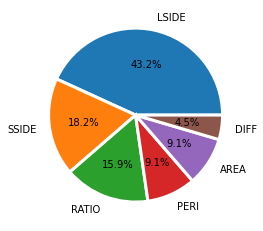

In [30]:
# library
import matplotlib.pyplot as plt
 
# create random data
values = [19,8,7,4,4,2]
names = ["LSIDE","SSIDE","RATIO","PERI","AREA","DIFF"]
 
# Create a pieplot
plt.pie

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15,autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show();

In [20]:
test3["Sort2"].value_counts()

LSIDE    8
SSIDE    8
DIFF     8
PERI     7
NONE     5
AREA     4
RATIO    3
SSide    1
Name: Sort2, dtype: int64

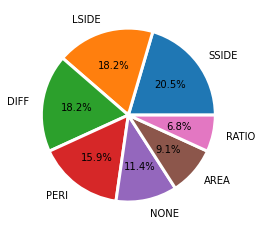

In [32]:
# library
import matplotlib.pyplot as plt
 
# create random data
values = [9,8,8,7,5,4,3]
names = ["SSIDE","LSIDE","DIFF","PERI","NONE","AREA","RATIO"]
 
# Create a pieplot
plt.pie

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15,autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show();

In [24]:
test2["Sort1"].value_counts()

PERI     6
SSIDE    5
AREA     4
LSIDE    3
DIFF     3
RATIO    2
Name: Sort1, dtype: int64

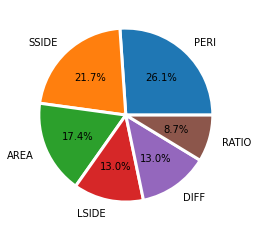

In [27]:
# library
import matplotlib.pyplot as plt
 
# create random data
values = [6,5,4,3,3,2]
names = ["PERI","SSIDE","AREA","LSIDE","DIFF","RATIO"]
 
# Create a pieplot
plt.pie

# Label distance: gives the space between labels and the center of the pie
plt.pie(values, labels=names, labeldistance=1.15,autopct='%1.1f%%', wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' });
plt.show();

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the

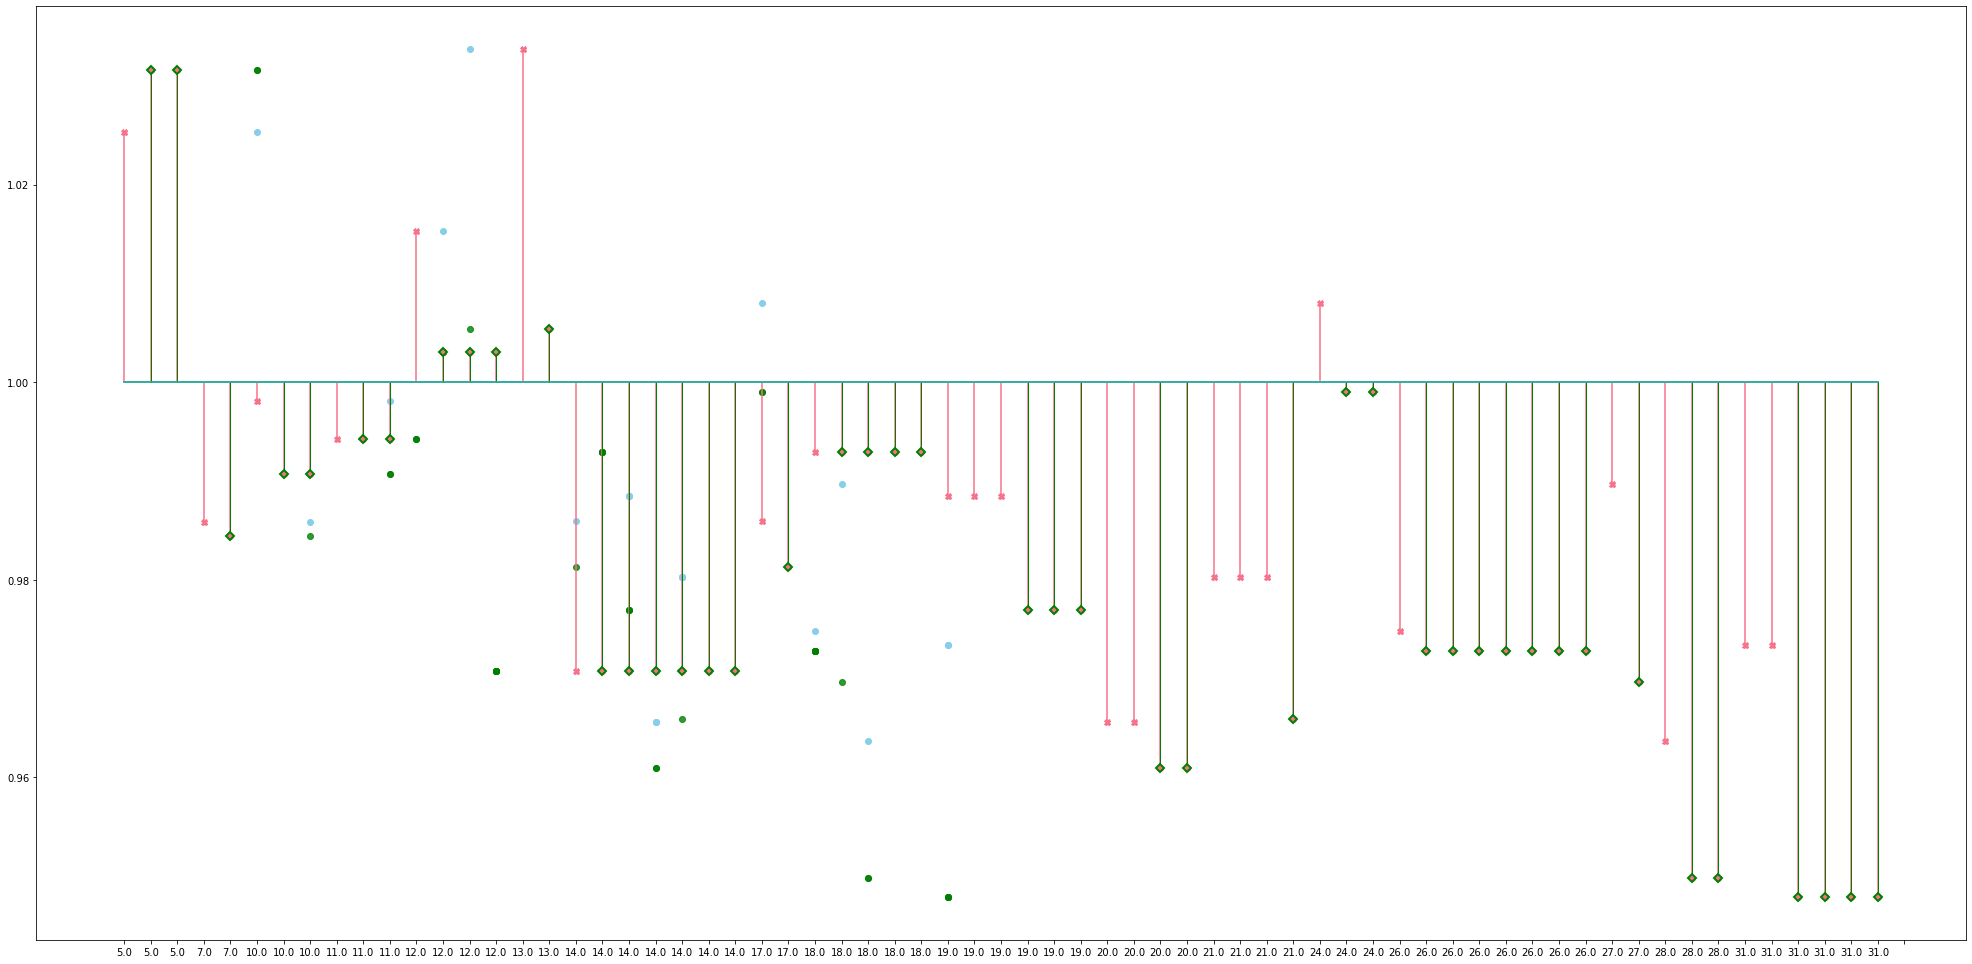

In [ ]:
# libraries
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = [27.50, 13.50]
plt.rcParams["figure.autolayout"] = True

my_range=range(0,len(test.index)+1)
plt.stem(test['Score1'] , bottom=1.0, markerfmt='X', use_line_collection=False)
#(markers, stemlines, baseline) = plt.stem(test['Score'], bottom=1.0)
plt.setp(stemlines, linestyle="-", color="red", linewidth=0.5 )
plt.stem(test['Score2'] , bottom=1.0)
(markers, stemlines, baseline) = plt.stem(test['Score2'], bottom=1.0)
plt.setp(stemlines, linestyle="-", color="green", linewidth=1 )
plt.setp(markers, marker='D', markersize=5, markeredgecolor="green", markeredgewidth=2)


plt.xticks(my_range, test['Day'])


#Vertikale Linien
plt.vlines(x=test["Day"], ymin=test['Score1'], ymax=test['Score2'], color='green', alpha=0.8)
plt.hlines(y=1, xmin=0, xmax=31, color='green', alpha=0.8)
plt.scatter(test["Day"],test['Score1'], color='skyblue', alpha=1, label='value1')
plt.scatter(test["Day"],test['Score2'], color='green', alpha=0.8 , label='value2')

#Horizontale Linien
#markerline1, stemlines, _ = plt.stem(test['Day'], test['Score1'], '-.',bottom=1.0)
#plt.setp(markerline1, 'markerfacecolor', 'b')
#markerline2, stemlines, _ = plt.stem(test['Day'], test['Score2'], '-.',bottom=1.0)
#plt.setp(markerline2, 'markerfacecolor', 'r')
#plt.xticks(my_range, test['Day'])

plt.show()

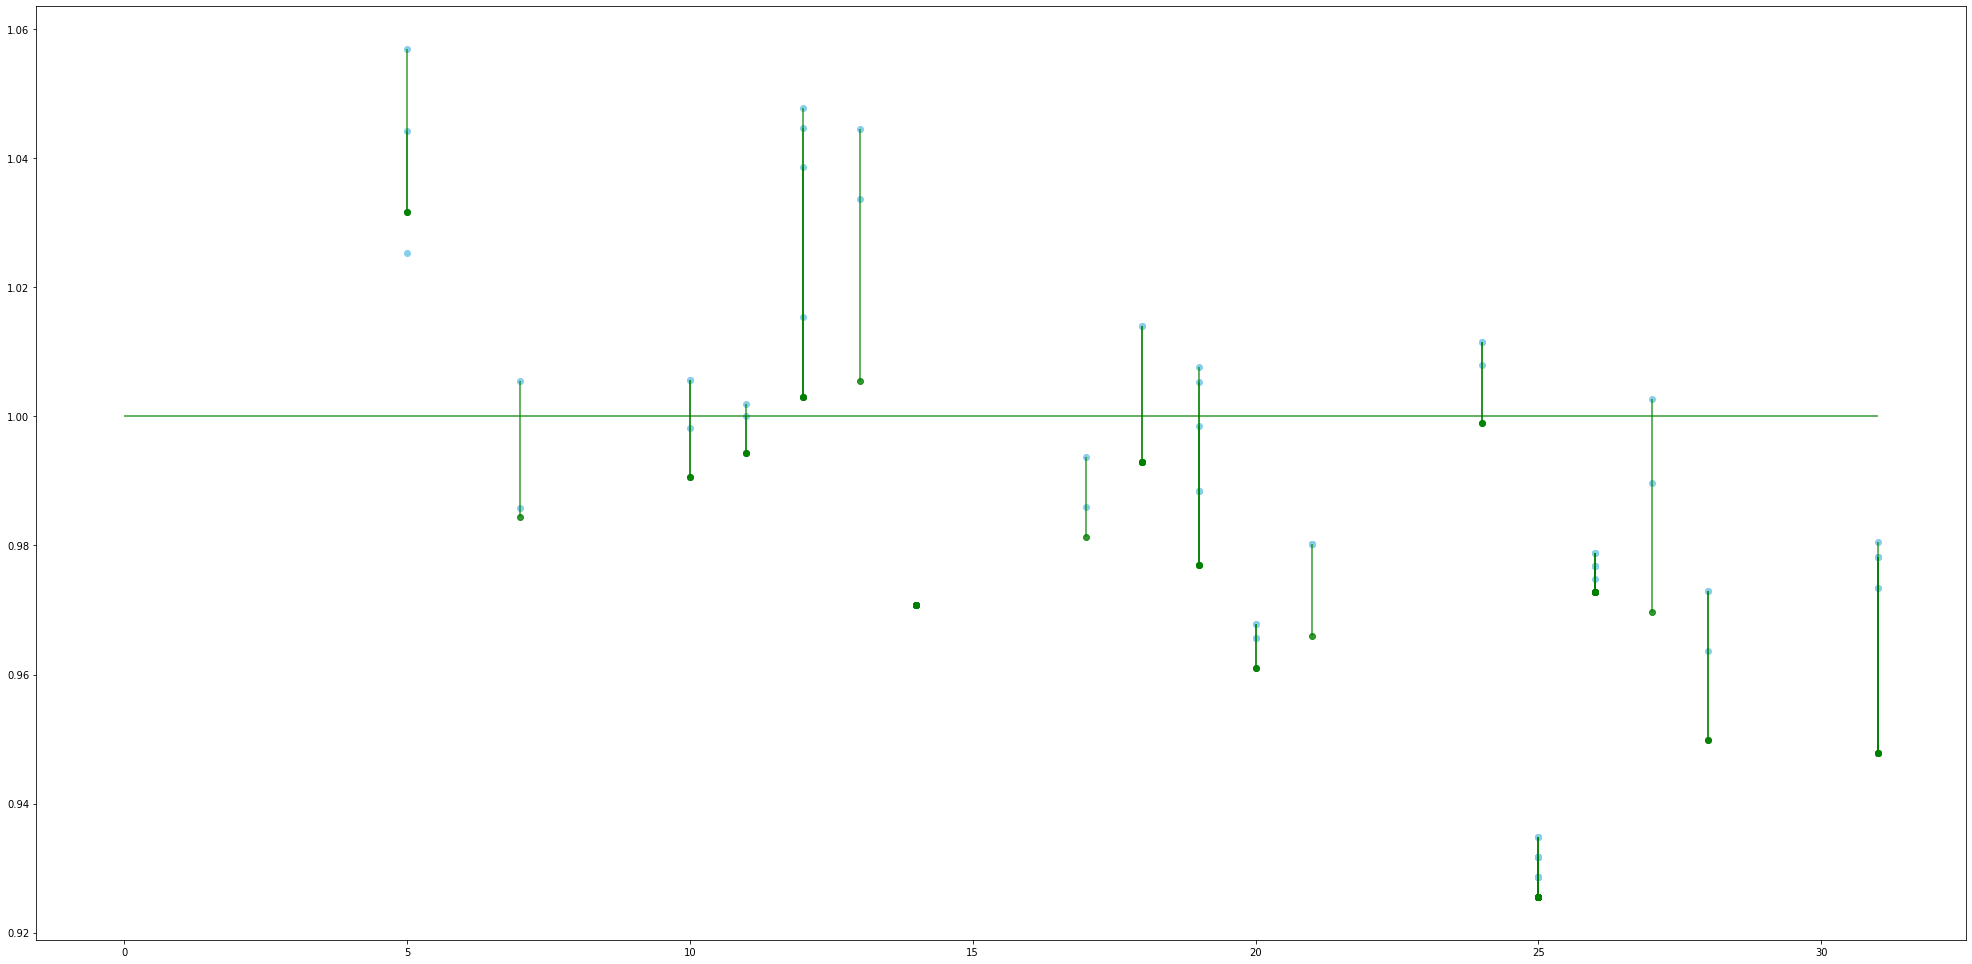

In [ ]:
#Vertikale Linien
plt.vlines(x=test["Day"], ymin=test['Score1'], ymax=test['Score2'], color='green', alpha=0.8)
plt.hlines(y=1, xmin=0, xmax=31, color='green', alpha=0.8)
plt.scatter(test["Day"],test['Score1'], color='skyblue', alpha=1, label='value1')
plt.scatter(test["Day"],test['Score2'], color='green', alpha=0.8 , label='value2')

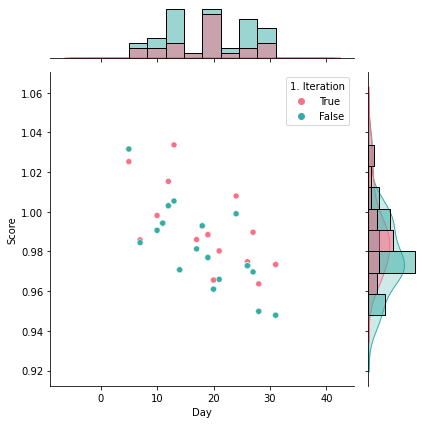

In [ ]:
#Another one 

sns.set_palette("husl",2)
g = sns.jointplot(data=test,
                    x="Day", 
                    y="Score",
                    kind="scatter", 
                    hue="1. Iteration",
                    palette="husl")
g.plot_marginals(sns.histplot, hue="1. Iteration")

#ax = g.ax_joint
#ax.hline(x=1, ls="--", c=".3")

#for patch in g.ax_marg_x.patches:
#    patch.set_facecolor(col1)

#for patch in g.ax_marg_y.patches:
#    patch.set_facecolor(col3) 


# Plot 2 subplots
#f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={"height_ratios": (.15, .85)})
 
# Add a graph in each part
#sns.histplot(data=test, x="Day", y="Score")
#sns.scatterplot(data=test, x=test["Day"], y=test["Score"], hue=test["1. Iteration"])

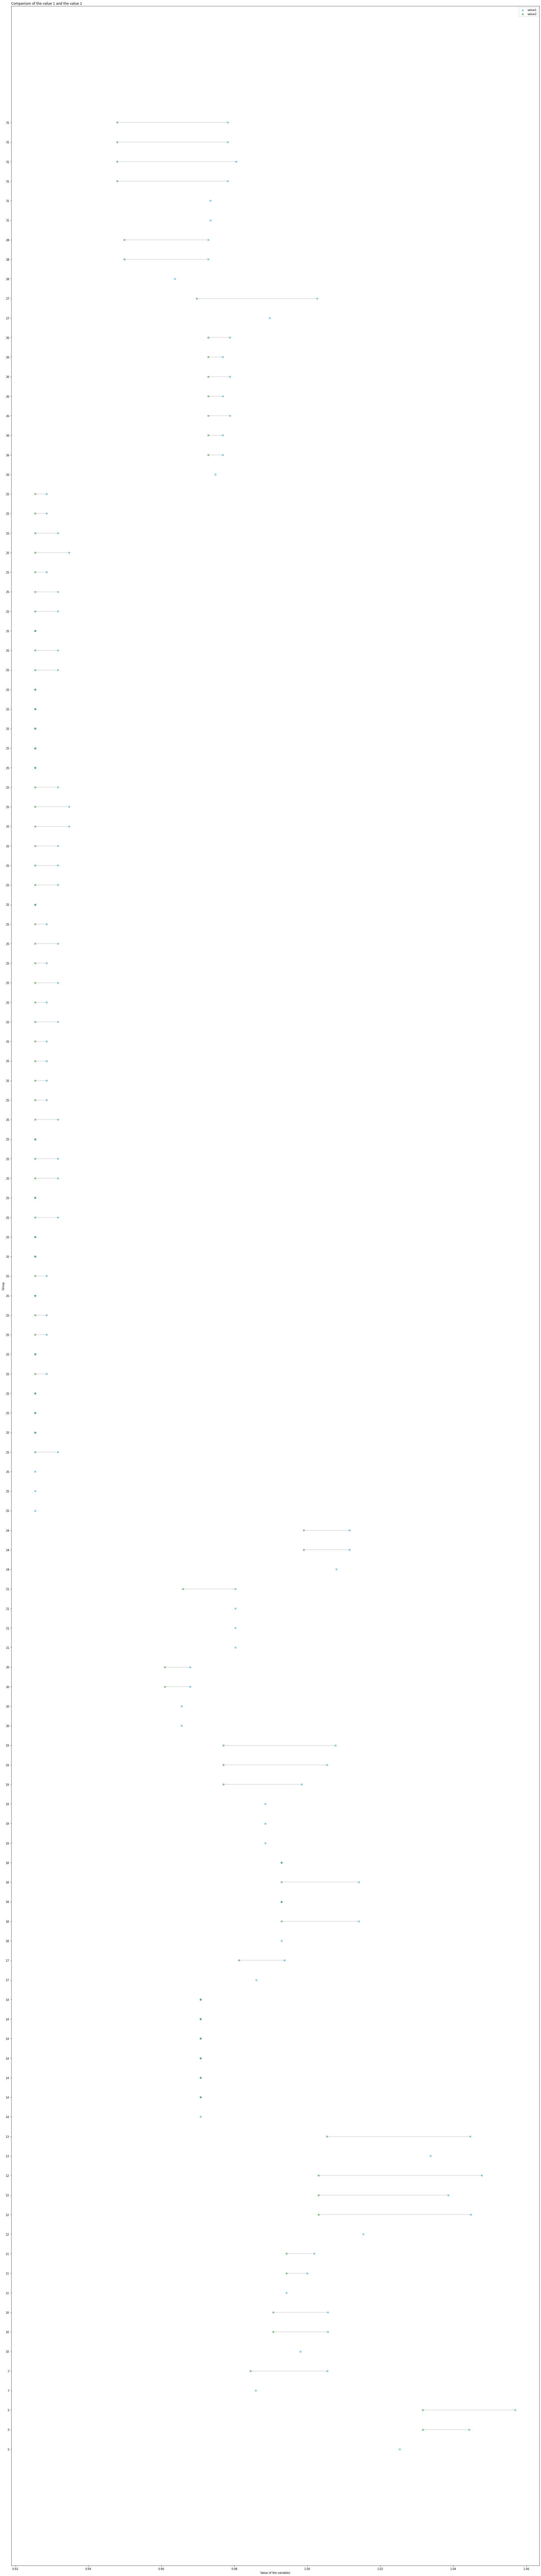

In [ ]:
# Reorder it following the values of the first value:

my_range=range(1,len(test.index)+1)

plt.rcParams["figure.figsize"] = [27.50, 130.50]
 
# The horizontal plot is made using the hline function
plt.lines(y=my_range, xmin=test['Score1'], xmax=test['Score2'], color='grey', alpha=0.4)
plt.scatter(test['Score1'], my_range, color='skyblue', alpha=1, label='value1')
plt.scatter(test['Score2'], my_range, color='green', alpha=0.4 , label='value2')
plt.legend()
 
# Add title and axis names
plt.yticks(my_range, test["Day"])
plt.title("Comparison of the value 1 and the value 2", loc='left')
plt.xlabel('Value of the variables')
plt.ylabel('Group')

# Show the graph
plt.show()

In [ ]:
sns.set_style('darkgrid')
sns.set_palette("husl",2)
g = sns.JointGrid()
x, y = test.ID, test.Score
sns.scatterplot(x=x, y=y, ax=g.ax_joint, hue=test["Iteration"], alpha=1)
sns.histplot(x=x, ax=g.ax_marg_x, bins=21, hue=test["Iteration"], alpha=0.5, legend=False)
sns.histplot(y=y, ax=g.ax_marg_y, bins=20, hue=test["Iteration"], alpha=0.5, legend=False)
g.set_axis_labels('Days', 'Score')
#g.ax_joint.set_xticks([1,5,10,15,20])
g.ax_joint.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
g.ax_marg_x.set_xlim(0,21)
g.ax_joint.plot([0,21], [1,1], 'black', linewidth = 0.5)
plt.suptitle("Performance Rectpack",y=1.01)

plt.savefig('Perfpack.png')